# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [90]:
import time
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

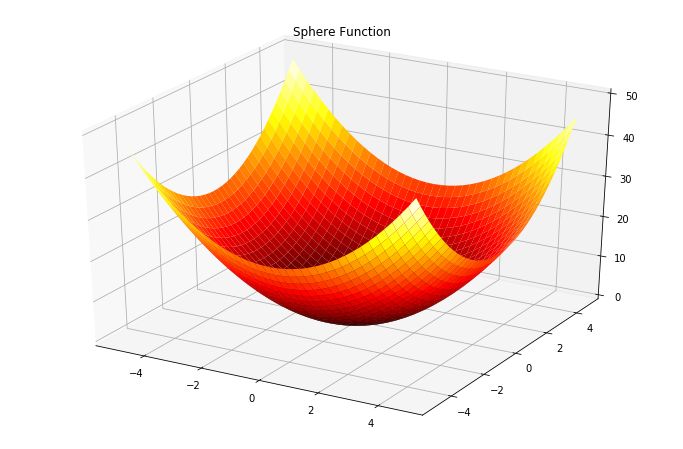

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

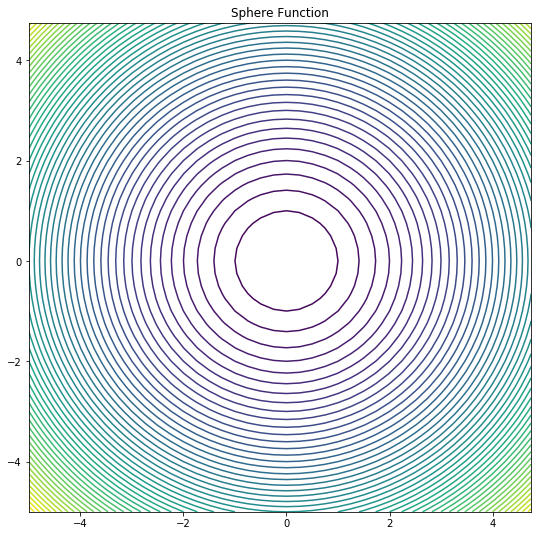

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

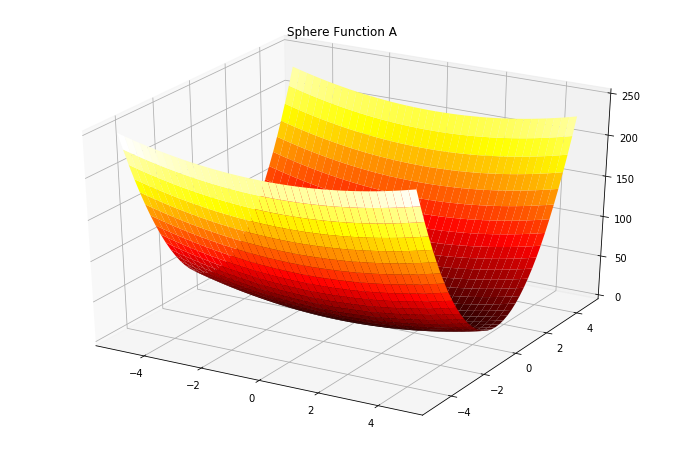

In [21]:
plot_3D_benchmark_function(objective_function_F1a, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function A')

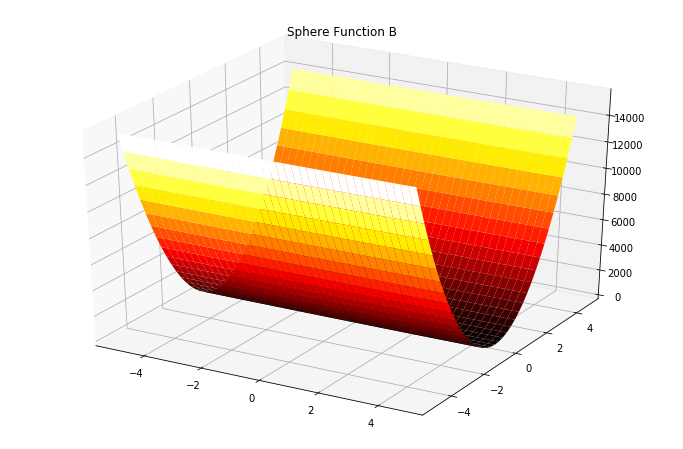

In [22]:
plot_3D_benchmark_function(objective_function_F1b, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function B')

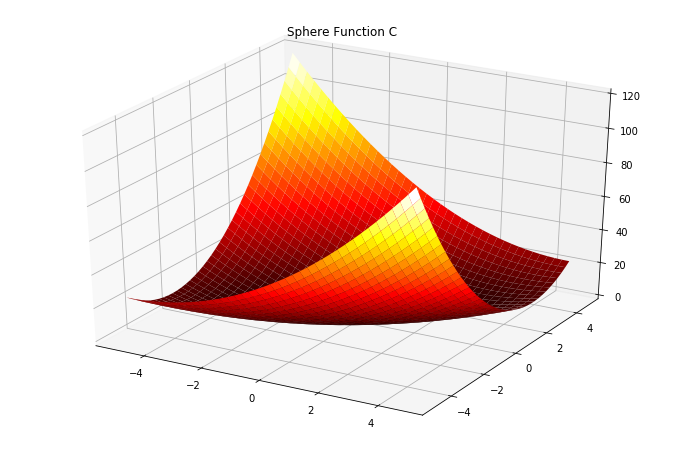

In [23]:
plot_3D_benchmark_function(objective_function_F1c, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function C')

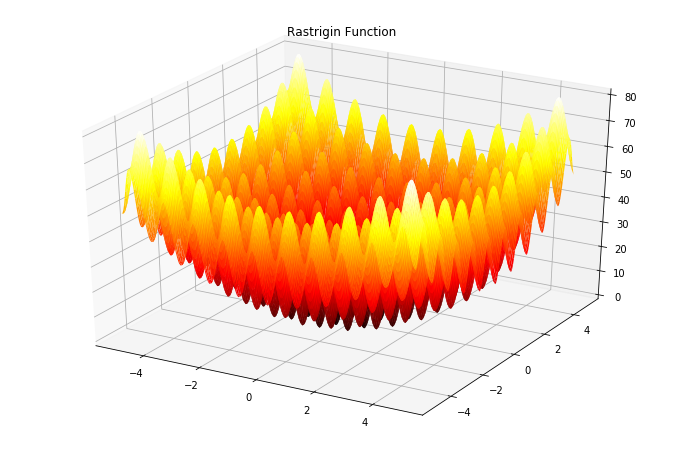

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

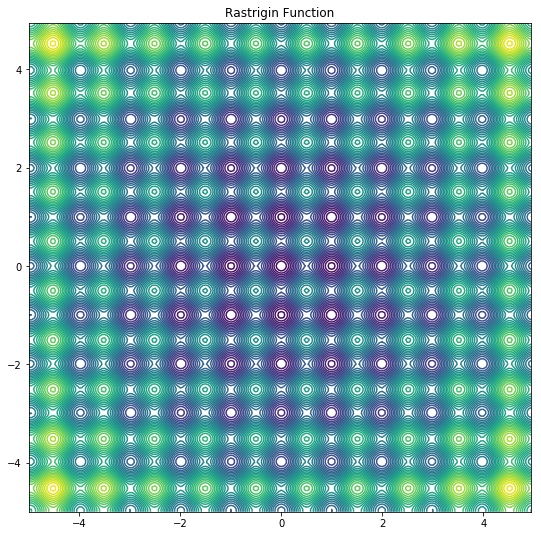

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

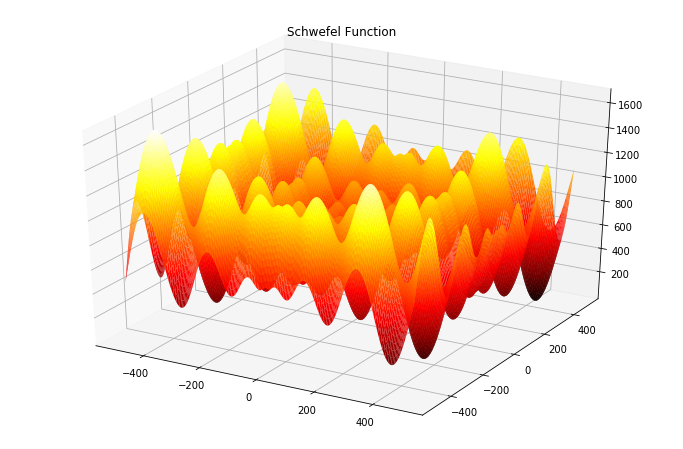

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

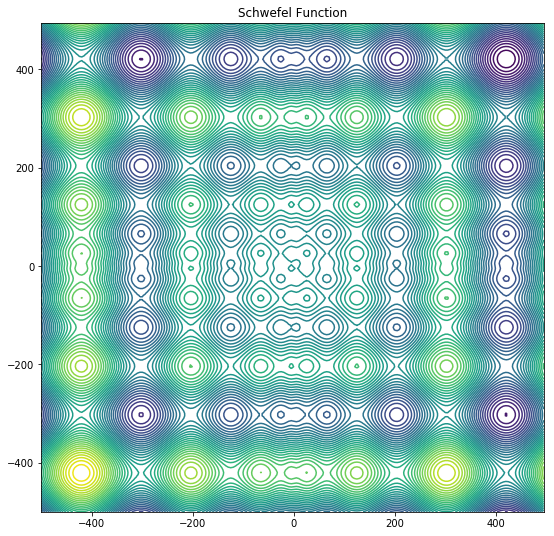

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

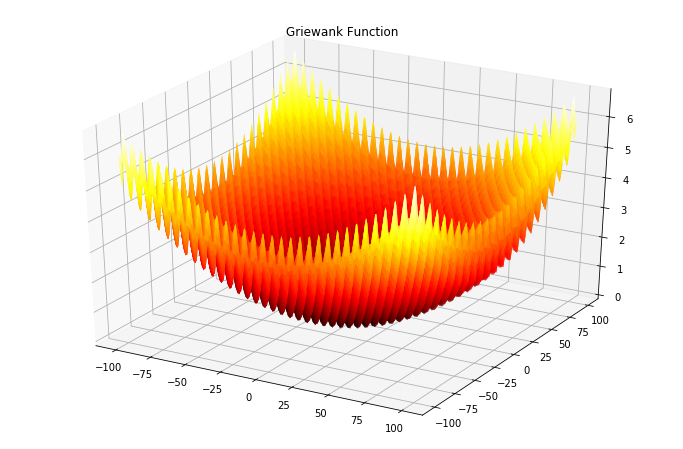

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

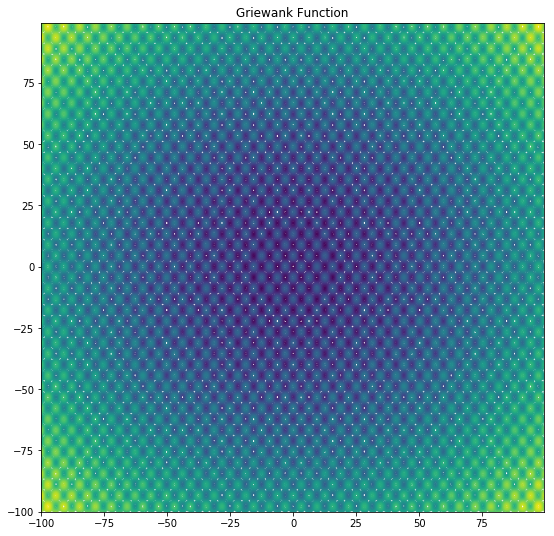

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [16]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [28]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

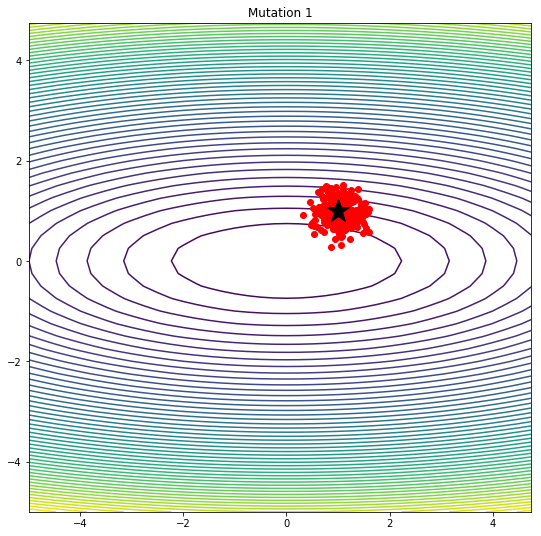

In [29]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [30]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

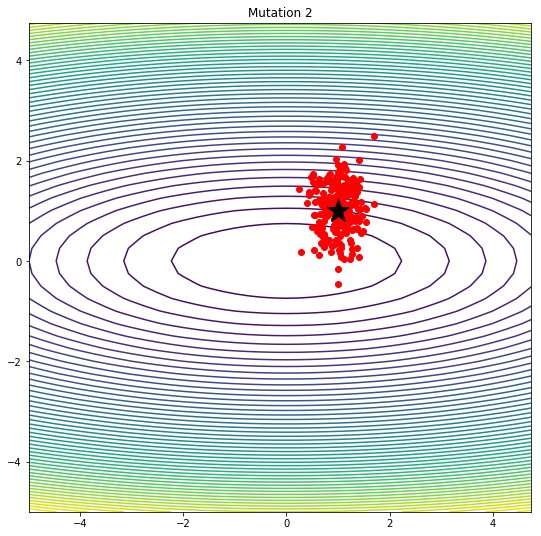

In [32]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [33]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

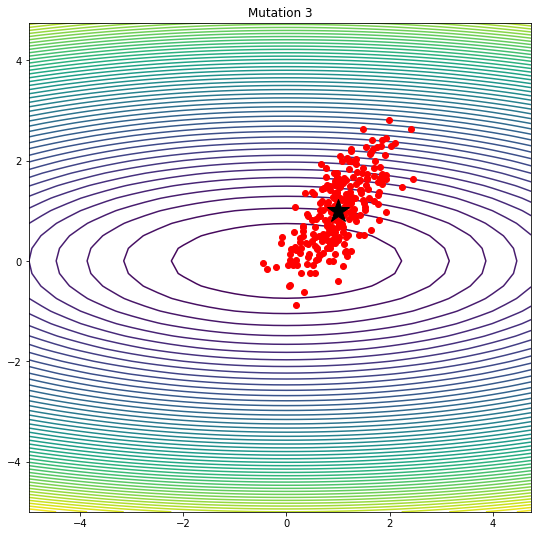

In [34]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [95]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, K=1.0):
    time0 = time.time()

    tau=K/np.sqrt(2*d),
    tau_0=K/np.sqrt(2*np.sqrt(d)),

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)
    
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if not t % (number_of_iterations/10) or t == number_of_iterations-1:
            print("Iteration %04d %14.8f: best = %0.8f, mean = %0.8f, std = %0.8f." % (
                t,
                time.time() - time0,
                log_objective_values[:t+1, 1].max(),
                log_objective_values[t, 2],
                log_objective_values[:t+1, 1].std(),
            ))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [76]:
def run_es(obj_function, d, N, T, sigma=50.0, K=1.0):
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function=obj_function,
        chromosome_length=d,
        population_size=N,
        number_of_iterations=T,
        number_of_offspring=2*N,
        number_of_parents=2,
        sigma=sigma,
        K=K,
    )

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -4235.75150631, mean score = -26293.88984699.
Iteration 0010 : best score = -29.01857213, mean score = -227.86957963.
Iteration 0020 : best score = -0.13307576, mean score = -0.65719646.
Iteration 0030 : best score = -0.00019140, mean score = -0.00146322.
Iteration 0040 : best score = -0.00000045, mean score = -0.00000303.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


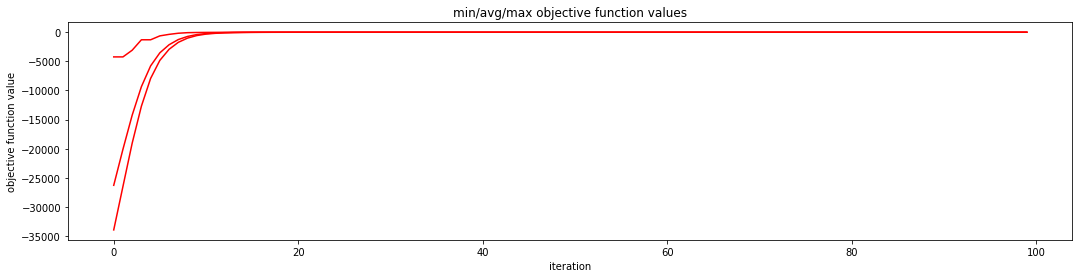

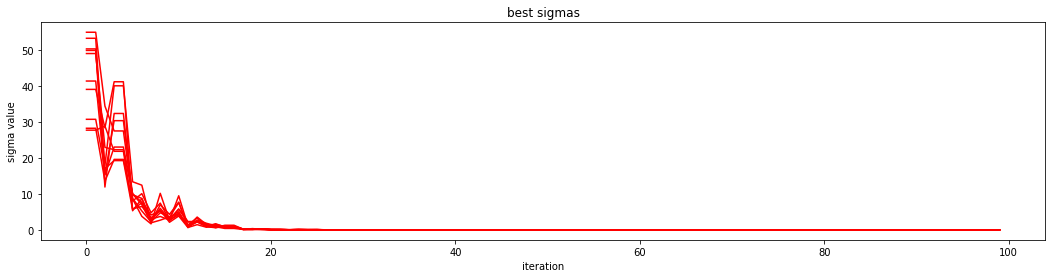

In [41]:
params = {
    'obj_function': objective_function_F1, 
    'd': 10,
    'N': 2000,
    'T': 100,
}
run_es(**params)

Iteration 0000 : best score = -100908.13053780, mean score = -159724.28541445.
Iteration 0024 : best score = -2113.90306062, mean score = -2964.72507918.
Iteration 0048 : best score = -57.49610199, mean score = -82.53937744.
Iteration 0072 : best score = -1.72157102, mean score = -2.48587115.
Iteration 0096 : best score = -0.06218142, mean score = -0.08794608.
Iteration 0120 : best score = -0.00208424, mean score = -0.00278886.
Iteration 0144 : best score = -0.00007270, mean score = -0.00009725.
Iteration 0168 : best score = -0.00000294, mean score = -0.00000414.
Iteration 0192 : best score = -0.00000011, mean score = -0.00000016.
Iteration 0216 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0239 : best score = -0.00000000, mean score = -0.00000000.


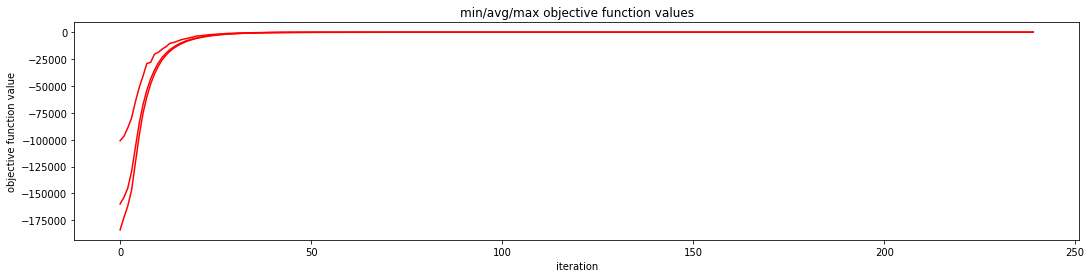

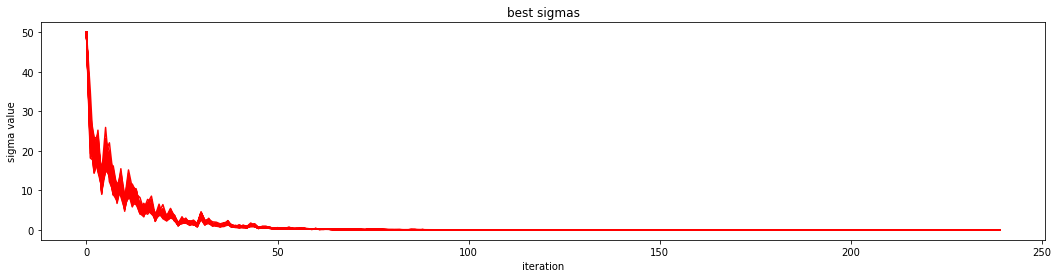

In [71]:
params = {
    'obj_function': objective_function_F1, 
    'd': 50,
    'N': 2000,
    'T': 240,
}
run_es(**params)

Iteration 0000 : best score = -242486.40945268, mean score = -325626.51697056.
Iteration 0040 : best score = -16001.47939662, mean score = -18838.89616338.
Iteration 0080 : best score = -2310.66696103, mean score = -2633.36212712.
Iteration 0120 : best score = -365.16615048, mean score = -407.24111974.
Iteration 0160 : best score = -58.75682142, mean score = -65.83481828.
Iteration 0200 : best score = -8.95182503, mean score = -9.96631496.
Iteration 0240 : best score = -1.11079455, mean score = -1.25365133.
Iteration 0280 : best score = -0.19708716, mean score = -0.22977888.
Iteration 0320 : best score = -0.03072095, mean score = -0.03318456.
Iteration 0360 : best score = -0.00508828, mean score = -0.00568931.
Iteration 0399 : best score = -0.00089065, mean score = -0.00097011.


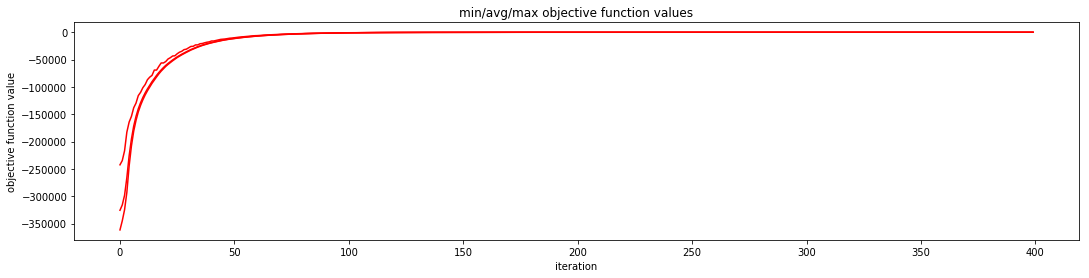

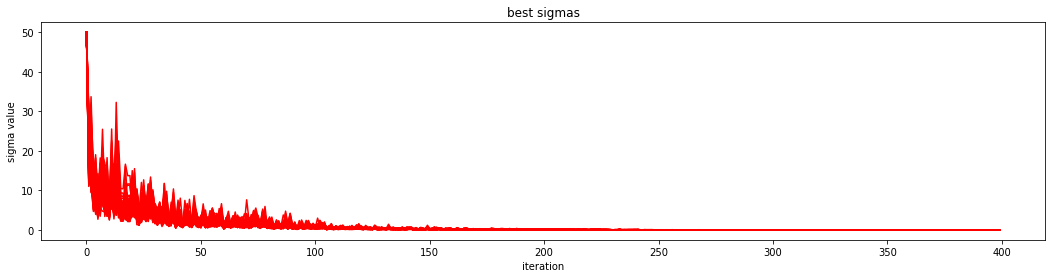

In [83]:
params = {
    'obj_function': objective_function_F1, 
    'd': 100,
    'N': 2000,
    'T': 400,
    'sigma': 50,
}
run_es(**params)

Iteration 0000 : best score = -220554.94906921, mean score = -277068.02854479.
Iteration 0040 : best score = -20154.46696528, mean score = -23144.60825375.
Iteration 0080 : best score = -2359.91643422, mean score = -2634.97359764.
Iteration 0120 : best score = -306.35384154, mean score = -337.91853966.
Iteration 0160 : best score = -43.10798850, mean score = -48.68316745.
Iteration 0200 : best score = -7.54357354, mean score = -8.37564798.
Iteration 0240 : best score = -1.05538565, mean score = -1.15395396.
Iteration 0280 : best score = -0.26271967, mean score = -0.28650944.
Iteration 0320 : best score = -0.04078758, mean score = -0.04362460.
Iteration 0360 : best score = -0.00509724, mean score = -0.00578324.
Iteration 0399 : best score = -0.00096963, mean score = -0.00109032.


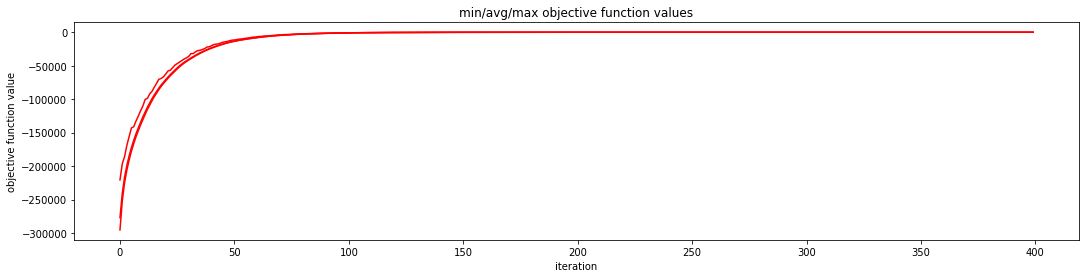

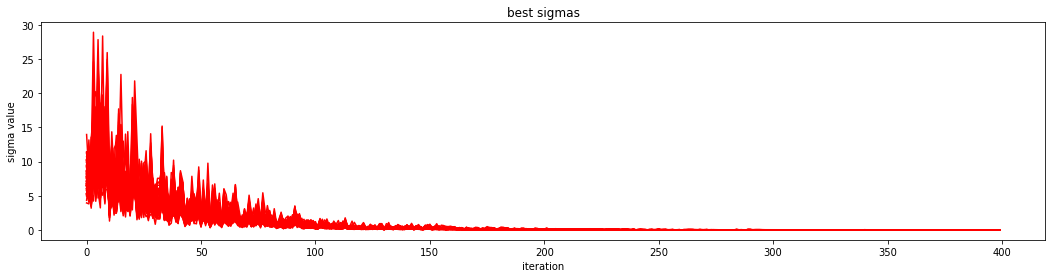

In [84]:
params = {
    'obj_function': objective_function_F1, 
    'd': 100,
    'N': 2000,
    'T': 400,
    'sigma': 10,
}
run_es(**params)

Iteration 0000 : best score = -203872.28113835, mean score = -265978.80948446.
Iteration 0040 : best score = -29169.31790618, mean score = -33438.26776924.
Iteration 0080 : best score = -3162.04187157, mean score = -3742.29330108.
Iteration 0120 : best score = -497.15300318, mean score = -569.06463816.
Iteration 0160 : best score = -87.33452614, mean score = -95.97426138.
Iteration 0200 : best score = -10.81588149, mean score = -12.48299391.
Iteration 0240 : best score = -1.16564595, mean score = -1.34582979.
Iteration 0280 : best score = -0.15289289, mean score = -0.17658081.
Iteration 0320 : best score = -0.02160677, mean score = -0.02433204.
Iteration 0360 : best score = -0.00408851, mean score = -0.00442554.
Iteration 0399 : best score = -0.00073120, mean score = -0.00079573.


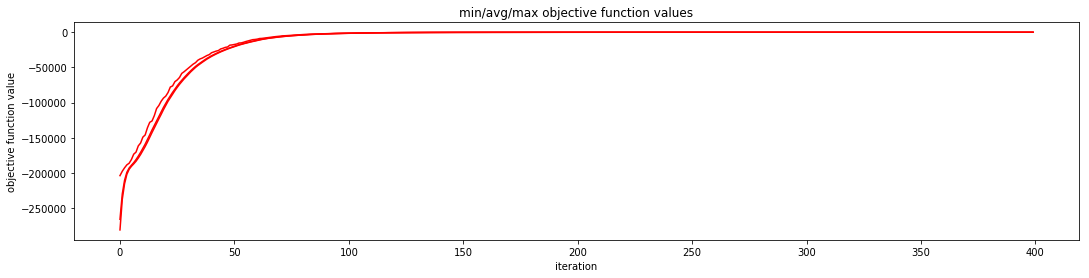

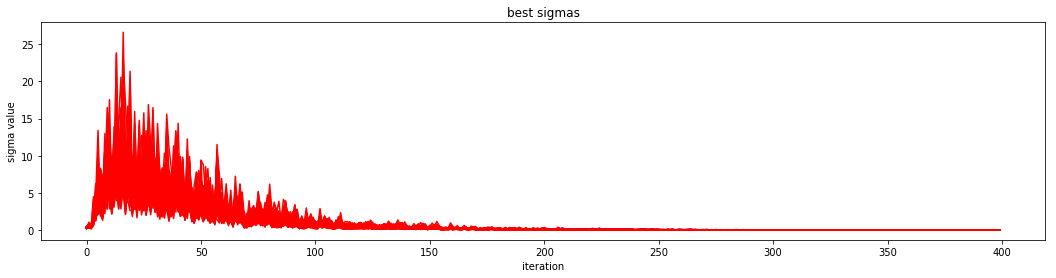

In [85]:
params = {
    'obj_function': objective_function_F1, 
    'd': 100,
    'N': 2000,
    'T': 400,
    'sigma': 1,
}
run_es(**params)

Iteration 0000 : best score = -196827.54707837, mean score = -330655.28902644.
Iteration 0040 : best score = -6638.02940247, mean score = -7933.98277875.
Iteration 0080 : best score = -279.70023294, mean score = -335.74432398.
Iteration 0120 : best score = -15.57291138, mean score = -18.55707438.
Iteration 0160 : best score = -0.99982328, mean score = -1.14559251.
Iteration 0200 : best score = -0.06443278, mean score = -0.07878588.
Iteration 0240 : best score = -0.00379248, mean score = -0.00439671.
Iteration 0280 : best score = -0.00022272, mean score = -0.00027679.
Iteration 0320 : best score = -0.00001335, mean score = -0.00001525.
Iteration 0360 : best score = -0.00000088, mean score = -0.00000100.
Iteration 0399 : best score = -0.00000006, mean score = -0.00000007.


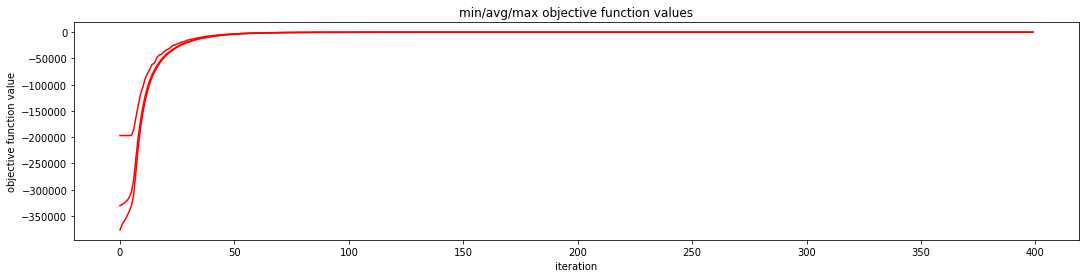

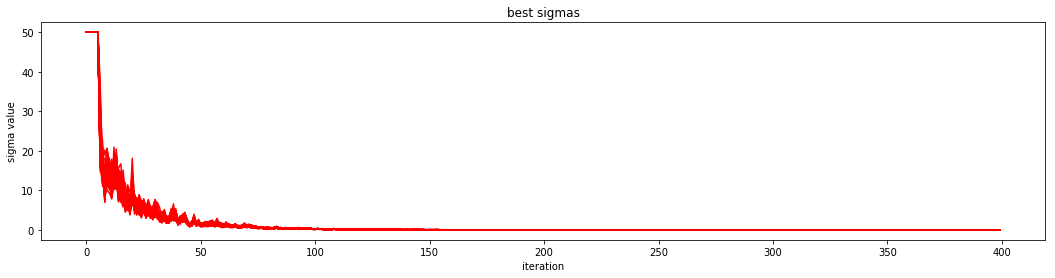

In [86]:
params = {
    'obj_function': objective_function_F1, 
    'd': 100,
    'N': 2000,
    'T': 400,
    'K': 0.5,
}
run_es(**params)

Iteration 0000 : best score = -220688.32626560, mean score = -310921.42063424.
Iteration 0040 : best score = -53414.09072750, mean score = -57829.85246398.
Iteration 0080 : best score = -14209.43590727, mean score = -15617.38556265.
Iteration 0120 : best score = -3949.58509399, mean score = -4189.73340780.
Iteration 0160 : best score = -1267.87227236, mean score = -1380.19763278.
Iteration 0200 : best score = -440.36479921, mean score = -470.94686911.
Iteration 0240 : best score = -228.82413385, mean score = -236.29866321.
Iteration 0280 : best score = -34.66366934, mean score = -41.30748255.
Iteration 0320 : best score = -18.42893765, mean score = -18.99270396.
Iteration 0360 : best score = -12.76774345, mean score = -12.99107992.
Iteration 0399 : best score = -11.35927141, mean score = -11.40205436.


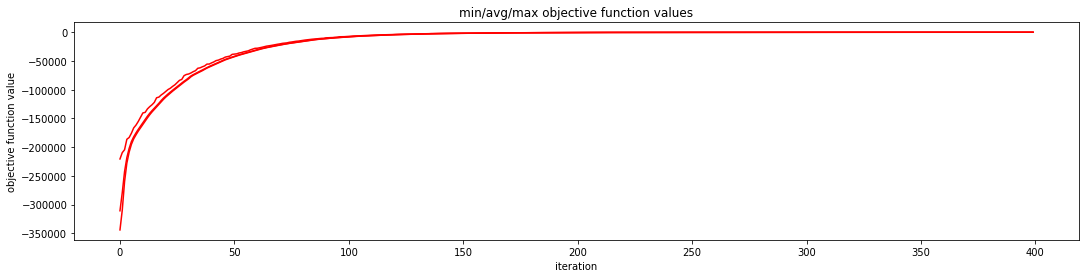

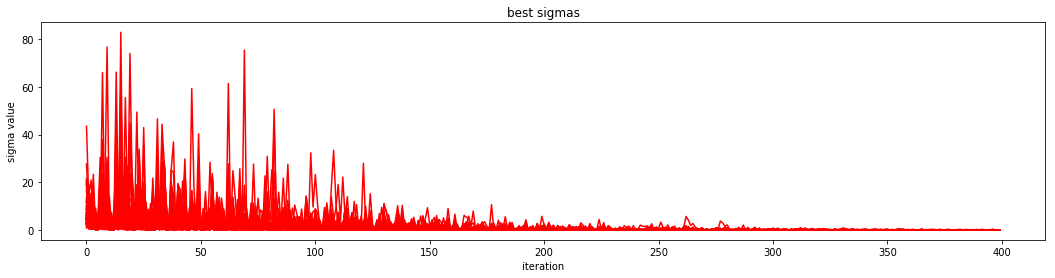

In [87]:
params = {
    'obj_function': objective_function_F1, 
    'd': 100,
    'N': 2000,
    'T': 400,
    'K': 3,
}
run_es(**params)

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -5690.88002747, mean score = -26570.54967244.
Iteration 0010 : best score = -90.46760907, mean score = -295.96795613.
Iteration 0020 : best score = -35.66668915, mean score = -75.63654710.
Iteration 0030 : best score = -24.11336461, mean score = -61.43755482.
Iteration 0040 : best score = -24.10776583, mean score = -54.83012483.
Iteration 0050 : best score = -3.91563905, mean score = -21.63366897.
Iteration 0060 : best score = -0.00765369, mean score = -0.05353288.
Iteration 0070 : best score = -0.00001442, mean score = -0.00011077.
Iteration 0080 : best score = -0.00000002, mean score = -0.00000018.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


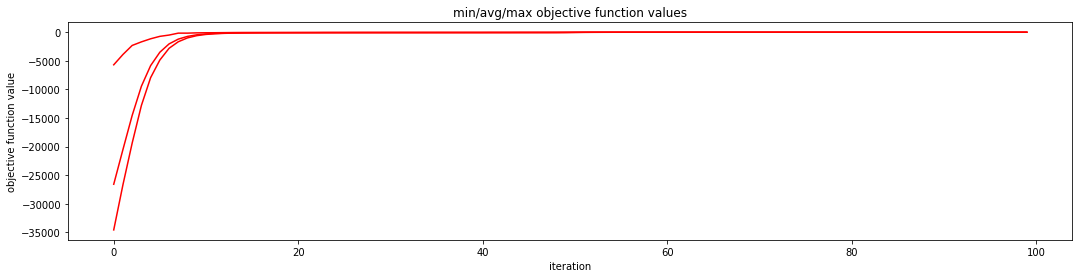

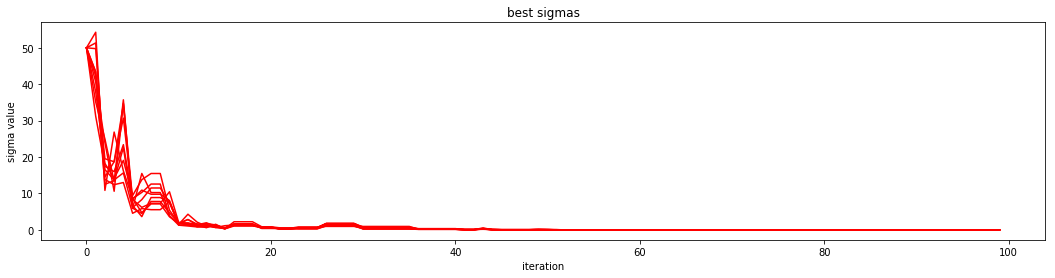

In [44]:
params = {
    'obj_function': objective_function_F6, 
    'd': 10,
    'N': 2000,
    'T': 100,
}
run_es(**params)

Iteration 0000     0.11360455: best = -28170.23058452, mean = -59116.76756586, std = 0.00000000.
Iteration 0080     7.44835591: best = -16.91443409, mean = -16.91459390, std = 4475.20441752.
Iteration 0160    14.88326168: best = -16.91430397, mean = -16.91430397, std = 3246.29181281.
Iteration 0240    22.27503467: best = -16.91430397, mean = -16.91430397, std = 2672.83100402.
Iteration 0320    29.49271917: best = -16.91430397, mean = -16.91430397, std = 2324.36785308.
Iteration 0400    36.60597539: best = -16.91430397, mean = -16.91430397, std = 2084.14386107.
Iteration 0480    43.56901550: best = -16.91430397, mean = -16.91430397, std = 1905.69792857.
Iteration 0560    50.45526123: best = -16.91430397, mean = -16.91430397, std = 1766.41213684.
Iteration 0640    57.66079044: best = -16.91430397, mean = -16.91430397, std = 1653.78550157.
Iteration 0720    65.18239808: best = -16.91430397, mean = -16.91430397, std = 1560.27320562.
Iteration 0799    72.37392855: best = -16.91430397, mean 

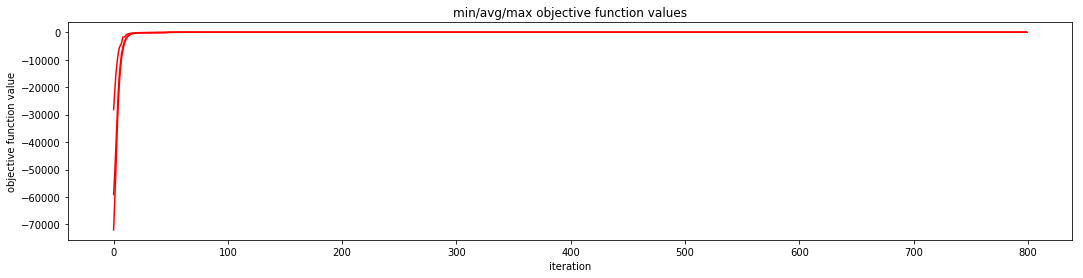

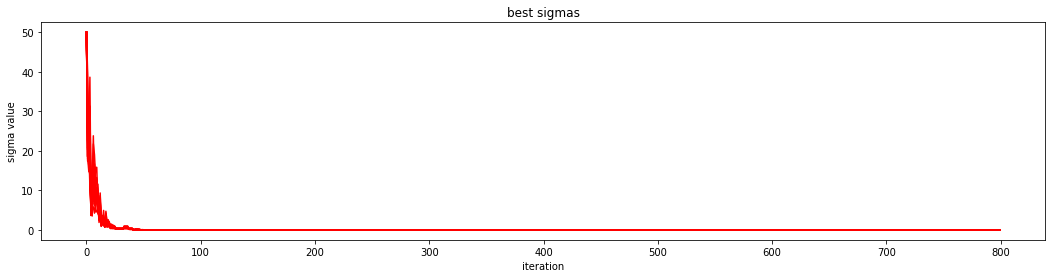

In [110]:
params = {
    'obj_function': objective_function_F6, 
    'd': 20,
    'N': 2000,
    'T': 1600,
    'sigma': 50,
}
run_es(**params)

In [111]:
params = {
    'obj_function': objective_function_F6, 
    'd': 20,
    'N': 2000,
    'T': 1600,
    'sigma': 1,
}
run_es(**params)

Iteration 0000     0.12772751: best = -29733.09754532, mean = -46476.98679339, std = 0.00000000.
Iteration 0080     7.39450693: best = -29.89137515, mean = -29.96143215, std = 6866.14105867.
Iteration 0160    14.59775209: best = -29.84873136, mean = -29.84873136, std = 5092.58481695.
Iteration 0240    21.75440669: best = -29.84873136, mean = -29.84873136, std = 4221.73666537.
Iteration 0320    28.62647414: best = -29.84873136, mean = -29.84873136, std = 3683.55033515.


KeyboardInterrupt: 

Iteration 0000     0.12052202: best = -29269.38980074, mean = -65491.06244032, std = 0.00000000.
Iteration 0080     7.04250956: best = -24.87433026, mean = -24.87484958, std = 6981.67002443.
Iteration 0160    14.06837106: best = -24.87396635, mean = -24.87396635, std = 5101.95964985.
Iteration 0240    21.41821504: best = -24.87396635, mean = -24.87396635, std = 4210.42097481.
Iteration 0320    28.57323003: best = -24.87396635, mean = -24.87396635, std = 3665.64254105.
Iteration 0400    35.51844049: best = -24.87396635, mean = -24.87396635, std = 3289.00279535.
Iteration 0480    42.43851328: best = -24.87396635, mean = -24.87396635, std = 3008.73124723.
Iteration 0560    49.34146523: best = -24.87396635, mean = -24.87396635, std = 2789.70571994.
Iteration 0640    56.24218845: best = -24.87396635, mean = -24.87396635, std = 2612.44962227.
Iteration 0720    63.19404697: best = -24.87396635, mean = -24.87396635, std = 2465.18100500.
Iteration 0799    70.16480160: best = -24.87396635, mean 

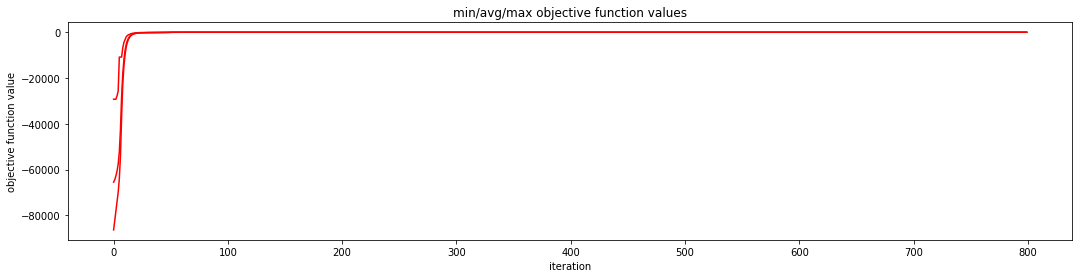

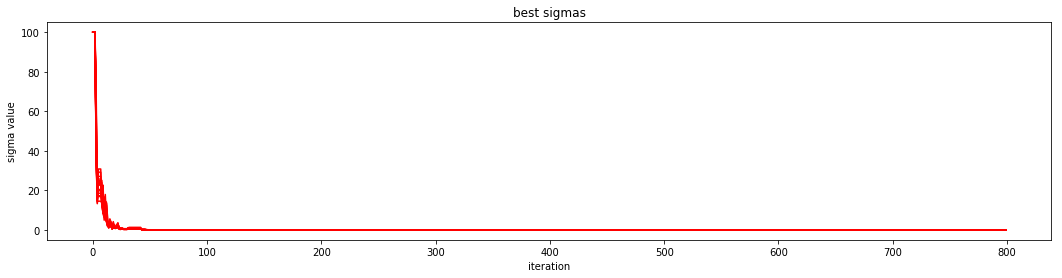

In [109]:
params = {
    'obj_function': objective_function_F6, 
    'd': 20,
    'N': 2000,
    'T': 800,
    'sigma': 100,
}
run_es(**params)

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.54143267, mean score = -7.59305265.
Iteration 0010 : best score = -0.67554100, mean score = -1.04923044.
Iteration 0020 : best score = -0.05719943, mean score = -0.31325744.
Iteration 0030 : best score = -0.00019973, mean score = -0.00115957.
Iteration 0040 : best score = -0.00000169, mean score = -0.00000745.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000004.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


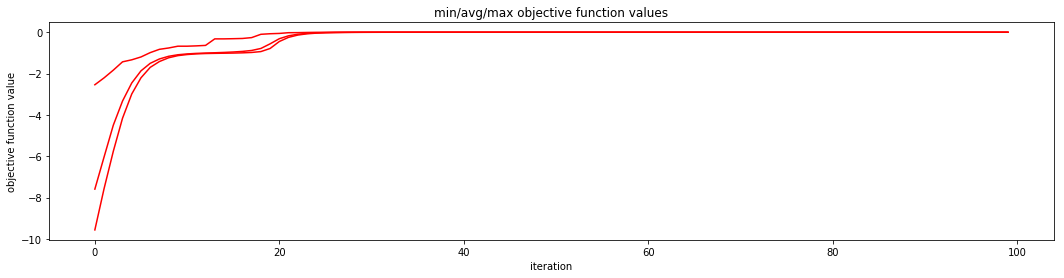

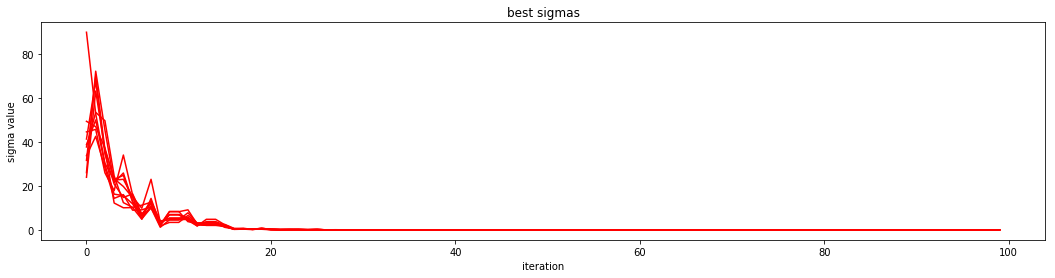

In [43]:
params = {
    'obj_function': objective_function_F8, 
    'd': 10,
    'N': 2000,
    'T': 100,
}
run_es(**params)

Iteration 0000     0.18299770: best = -62.49571856, mean = -82.04136117, std = 0.00000000.
Iteration 0030     4.07186079: best = -8.45164959, mean = -9.53201612, std = 14.92538922.
Iteration 0060     8.12264895: best = -2.42273297, mean = -2.67013164, std = 14.55911565.
Iteration 0090    12.11076450: best = -1.37307486, mean = -1.41876464, std = 13.35602693.
Iteration 0120    16.05302596: best = -1.10055928, mean = -1.11535726, std = 12.23799331.
Iteration 0150    20.48047972: best = -0.68825789, mean = -0.77216616, std = 11.31752292.
Iteration 0180    26.46786141: best = -0.34945167, mean = -0.37289122, std = 10.58882867.
Iteration 0210    30.52231932: best = -0.16957808, mean = -0.18184296, std = 9.98730193.
Iteration 0240    34.43879867: best = -0.05205587, mean = -0.05614064, std = 9.47743055.
Iteration 0270    38.22017670: best = -0.01805688, mean = -0.01974132, std = 9.03666133.
Iteration 0299    41.85984468: best = -0.00556071, mean = -0.00615216, std = 8.66209685.


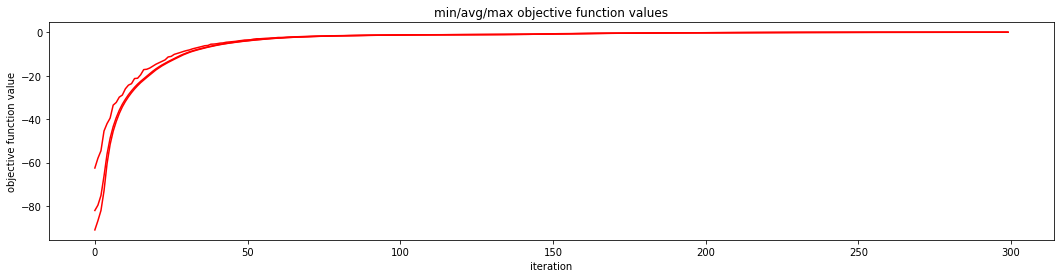

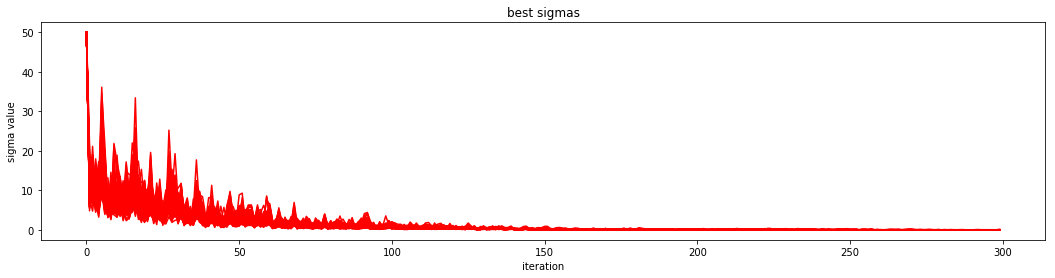

In [104]:
params = {
    'obj_function': objective_function_F8, 
    'd': 100,
    'N': 2000,
    'T': 300,
}
run_es(**params)

### Działanie strategii ewolucyjnej dla funkcji Shwefela F7

Iteration 0000     0.18327451: best = -3210.80853776, mean = -3974.39573448, std = 0.00000000.
Iteration 0020     1.87315559: best = 6067462.84758462, mean = 629685.60124834, std = 1389545.73624743.
Iteration 0040     3.60430980: best = 9239726772.98268127, mean = 1819157320.84420490, std = 1911871001.76694560.
Iteration 0060     5.29860950: best = 25287962166758.78906250, mean = 4224445135878.57910156, std = 4767505265318.11621094.
Iteration 0080     7.00605297: best = 101152251277882672.00000000, mean = 25170890905594120.00000000, std = 15695547735360786.00000000.
Iteration 0100     8.73379445: best = 68285880916405837824.00000000, mean = 15821164171727792128.00000000, std = 9017733135447660544.00000000.
Iteration 0120    10.48462892: best = 87315071501935489056768.00000000, mean = 17858539047115164745728.00000000, std = 10383342422128448241664.00000000.
Iteration 0140    12.18591261: best = 89351653989187854297726976.00000000, mean = 22551788966616396438962176.00000000, std = 102866

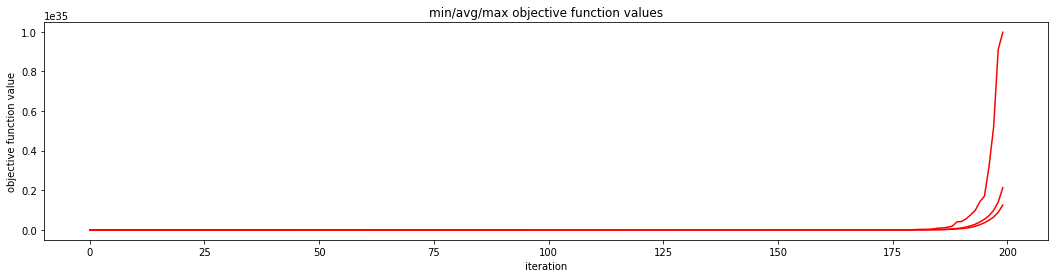

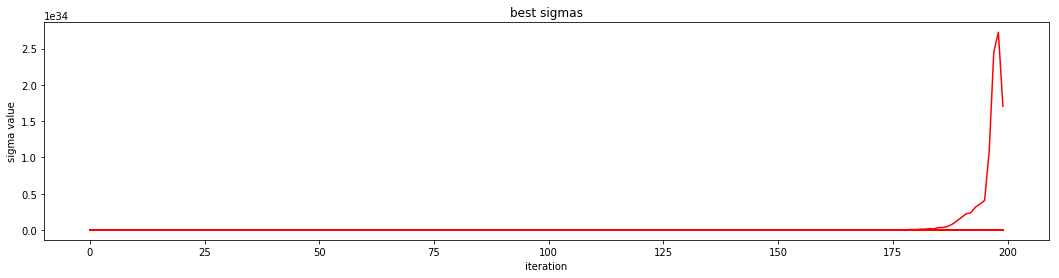

In [103]:
params = {
    'obj_function': objective_function_F7,
    'd': 10,
    'N': 2000,
    'T': 200,
}
run_es(**params)